### Intersect (Perpotongan)

Titik yang berada dalam poligon:
  facility     geometry  index_right    area
0       F1  POINT (1 1)            0  Area 1
1       F2  POINT (4 4)            0  Area 1
1       F2  POINT (4 4)            1  Area 2
2       F3  POINT (6 6)            1  Area 2


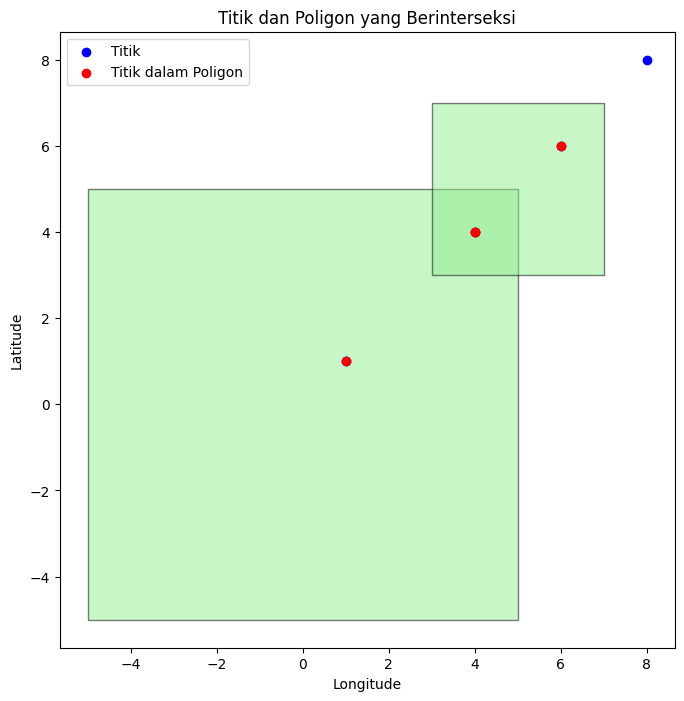

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Membuat GeoDataFrame untuk Poligon (misal batas wilayah)
polygons = gpd.GeoDataFrame({
    'area': ['Area 1', 'Area 2'],
    'geometry': [
        Polygon([(-5, -5), (-5, 5), (5, 5), (5, -5), (-5, -5)]),  # Area 1
        Polygon([(3, 3), (3, 7), (7, 7), (7, 3), (3, 3)])  # Area 2
    ]
})

# Membuat GeoDataFrame untuk Titik (misal lokasi fasilitas kesehatan)
points = gpd.GeoDataFrame({
    'facility': ['F1', 'F2', 'F3', 'F4'],
    'geometry': [
        Point(1, 1),  # F1 di dalam Area 1
        Point(4, 4),  # F2 di dalam Area 2
        Point(6, 6),  # F3 di dalam Area 2
        Point(8, 8)   # F4 di luar semua area
    ]
})

# CRS tetap sama (tidak perlu diubah dalam contoh ini karena ini adalah data buatan)
polygons.crs = "EPSG:4326"
points.crs = "EPSG:4326"

# Melakukan operasi intersect: mencari titik yang berada di dalam poligon
points_in_polygons = gpd.sjoin(points, polygons, how="inner", predicate='intersects')

# Menampilkan hasil
print("Titik yang berada dalam poligon:")
print(points_in_polygons)

# Plot hasilnya
fig, ax = plt.subplots(figsize=(8, 8))

# Plot poligon
polygons.plot(ax=ax, color='lightgreen', edgecolor='black', alpha=0.5)

# Plot titik
points.plot(ax=ax, color='blue', marker='o', label='Titik')

# Plot titik yang berada di dalam poligon
points_in_polygons.plot(ax=ax, color='red', marker='o', label='Titik dalam Poligon')

# Menambahkan keterangan
plt.title("Titik dan Poligon yang Berinterseksi")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

plt.show()

### Union (Penggabungan)

/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_36405/1039889571.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union_polygon = gdf_polygons.geometry.unary_union
/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_36405/1039889571.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_36405/1039889571.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


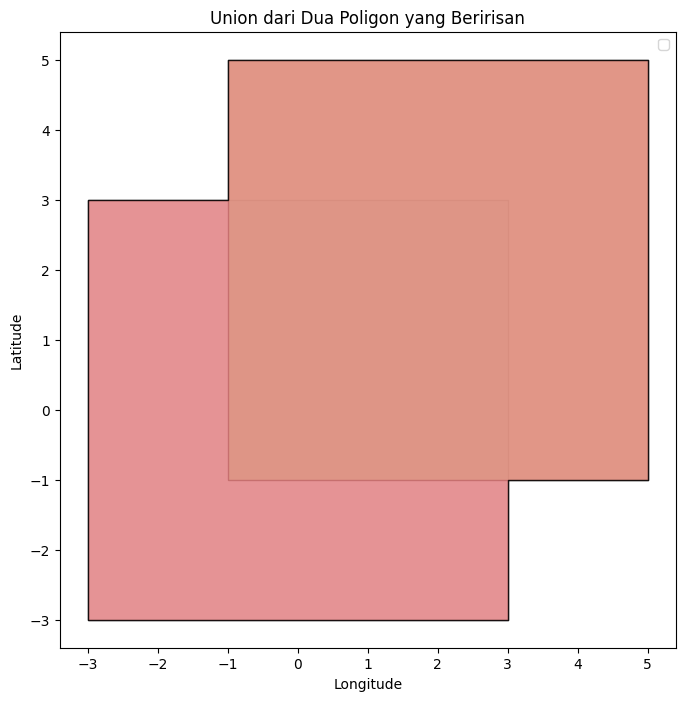

In [19]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Membuat dua poligon GeoDataFrame yang saling beririsan
gdf_polygons = gpd.GeoDataFrame({
    'name': ['Polygon 1', 'Polygon 2'],
    'geometry': [
        Polygon([(-3, -3), (-3, 3), (3, 3), (3, -3)]),  # Polygon 1
        Polygon([(-1, -1), (-1, 5), (5, 5), (5, -1)])   # Polygon 2 (beririsan dengan Polygon 1)
    ]
})

# Melakukan operasi union untuk menggabungkan dua poligon
union_polygon = gdf_polygons.geometry.unary_union

# Membuat plot untuk visualisasi
fig, ax = plt.subplots(figsize=(8, 8))

# Plot poligon asli
gdf_polygons.plot(ax=ax, color=['lightblue', 'lightgreen'], edgecolor='black', alpha=0.8, label='Poligon Asli')

# Plot hasil union
gpd.GeoSeries([union_polygon]).plot(ax=ax, color='lightcoral', edgecolor='black', alpha=0.8, label='Union Poligon')

# Menambahkan judul dan label
plt.title("Union dari Dua Poligon yang Beririsan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Menampilkan plot
plt.show()


### Difference (Selisih)

/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_36405/2780223757.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/0c/s4bn1y5d3k3243ym_hrjnyqh0000gp/T/ipykernel_36405/2780223757.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


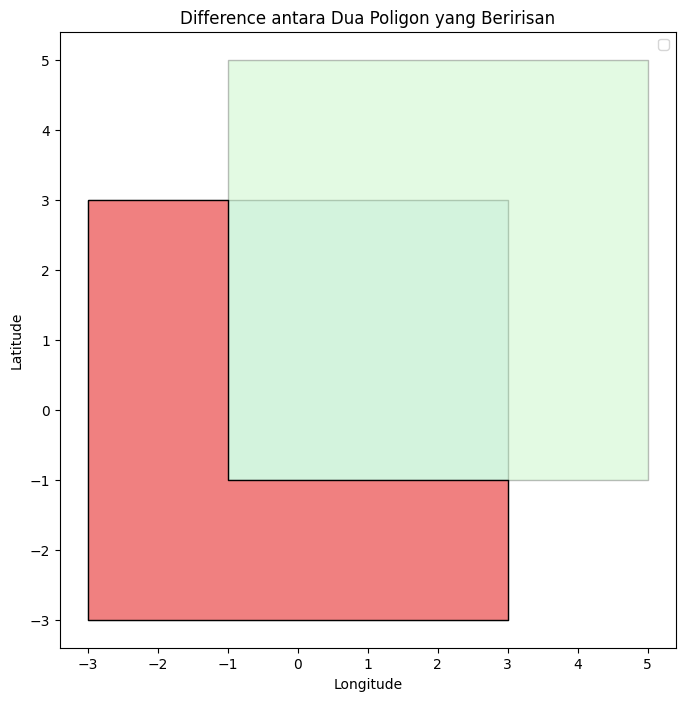

In [20]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Membuat dua poligon yang saling beririsan
gdf_polygons = gpd.GeoDataFrame({
    'name': ['Polygon 1', 'Polygon 2'],
    'geometry': [
        Polygon([(-3, -3), (-3, 3), (3, 3), (3, -3)]),  # Polygon 1
        Polygon([(-1, -1), (-1, 5), (5, 5), (5, -1)])   # Polygon 2 (beririsan dengan Polygon 1)
    ]
})

# Melakukan operasi difference untuk menghitung perbedaan antara Polygon 1 dan Polygon 2
difference_polygon = gdf_polygons.geometry[0].difference(gdf_polygons.geometry[1])

# Membuat plot untuk visualisasi
fig, ax = plt.subplots(figsize=(8, 8))

# Plot poligon asli
gdf_polygons.plot(ax=ax, color=['lightblue', 'lightgreen'], edgecolor='black', alpha=0.25, label='Poligon Asli')

# Plot hasil difference
gpd.GeoSeries([difference_polygon]).plot(ax=ax, color='lightcoral', edgecolor='black', alpha=1, label='Difference Poligon')

# Menambahkan judul dan label
plt.title("Difference antara Dua Poligon yang Beririsan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

# Menampilkan plot
plt.show()
